Test R notebook

- try things with python first and then verify with R?

In [3]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/607d6b3929befce813fe5ba2-reshare_rates.csv")
head(data)

,user_id,consent,timeSubmitted,educationLevel,attendsProtests,politicalAffiliation,age,gender_man,gender_woman,affiliatedMovements_climate,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-7.159047e+18,1,2021-05-24 11:30:25.884000+00:00,highSchool,False,centreRight,28,1,0,1,⋯,0,0,0,Control,High,0.0,0.0,0,0.0,NA
2,-7.159047e+18,1,2021-05-24 11:30:25.884000+00:00,highSchool,False,centreRight,28,1,0,1,⋯,0,0,0,Control,Low,0.0,0.0,0,0.0,NA
3,-6.619931e+18,1,2021-05-24 12:17:00.336000+00:00,highSchool,0,centreLeft,19,1,0,1,⋯,0,0,1,Treatment,High,0.1,0.0,0,0.5,1.0000000
4,-6.619931e+18,1,2021-05-24 12:17:00.336000+00:00,highSchool,0,centreLeft,19,1,0,1,⋯,0,0,1,Treatment,Low,0.1,0.1,0,0.0,0.5000000
5,-6.058564e+18,1,2021-05-24 11:19:59.690000+00:00,communityCollege,False,centre,50,1,0,0,⋯,1,1,0,Control,High,0.0,0.2,0,0.0,0.0000000
6,-6.058564e+18,1,2021-05-24 11:19:59.690000+00:00,communityCollege,False,centre,50,1,0,0,⋯,1,1,0,Control,Low,0.1,0.2,0,0.0,0.3333333


In [5]:
aov1 <- aov(Affirms ~ condition * evidence + (1 | user_id), data=data)
summary(aov1)

                   Df Sum Sq Mean Sq F value Pr(>F)
condition           1 0.0375 0.03750   1.236  0.288
evidence            1 0.0225 0.02250   0.742  0.406
condition:evidence  1 0.0135 0.01350   0.445  0.517
Residuals          12 0.3640 0.03033               

In [6]:
model.tables(aov1, type = "means")

Tables of means
Grand mean
       
0.1375 

 condition 
    Control Treatment
        0.1       0.2
rep    10.0       6.0

 evidence 
     High Low
    0.175 0.1
rep 8.000 8.0

 condition:evidence 
           evidence
condition   High Low 
  Control   0.16 0.04
  rep       5.00 5.00
  Treatment 0.20 0.20
  rep       3.00 3.00

In [7]:
md <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
summary(md)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -2.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9187 -0.5742 -0.2297  0.3445  2.5263 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.00000  0.0000  
 Residual             0.03033  0.1742  
Number of obs: 16, groups:  user_id, 8

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.16000    0.07789   2.054
conditionTreatment              0.04000    0.12719   0.314
evidenceLow                    -0.12000    0.11015  -1.089
conditionTreatment:evidenceLow  0.12000    0.17988   0.667

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.612              
evidenceLow -0.707  0.433       
cndtnTrtm:L  0.433 -0.707 -0.612
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


In [8]:
confint(md)

Computing profile confidence intervals ...

Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”
Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”
Warning message in FUN(X[[i]], ...):
“non-monotonic profile for .sig01”
Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“unexpected decrease in profile: using minstep”
Warning message in FUN(X[[i]], ...):
“non-monotonic profile for .sigma”
Warning message in confint.thpr(pp, level = level, zeta = zeta):
“bad spline fit for .sig01: falling back to linear interpolation”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in confint.thpr(pp, level = level, zeta = zeta):
“bad spline fit for .sigma: falling back to linear interpolation”


,2.5 %,97.5 %
.sig01,0.00000000,0.16099238
.sigma,0.11070039,0.22343817
(Intercept),0.01944622,0.30055379
conditionTreatment,-0.18952337,0.26952337
evidenceLow,-0.31877307,0.07877307
conditionTreatment:evidenceLow,-0.20459506,0.44459507


lattice theme set by effectsTheme()
See ?effectsTheme for details.



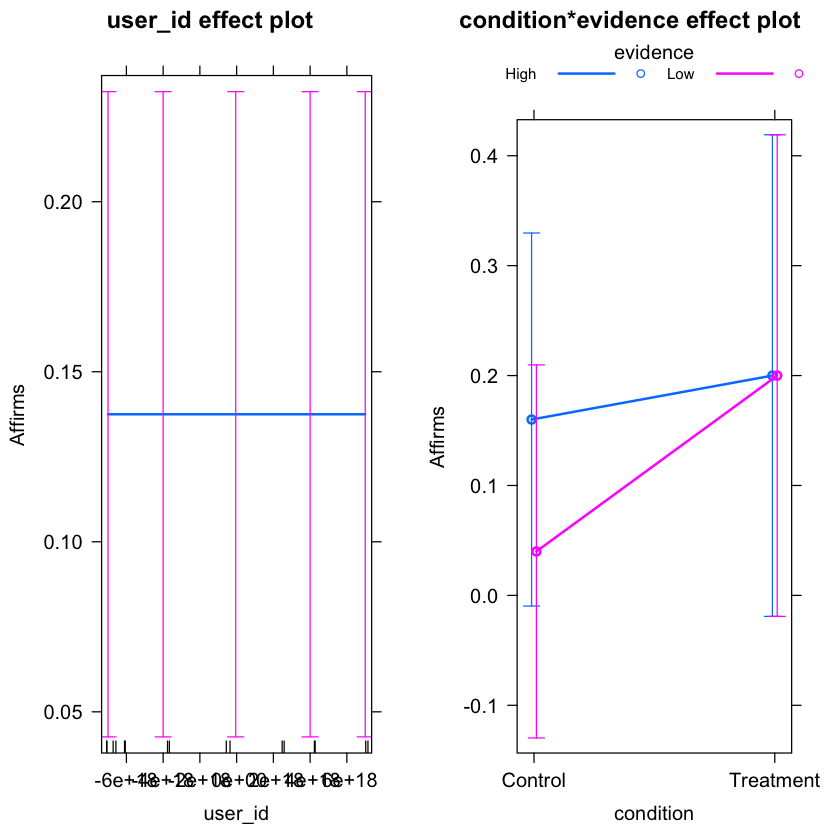

In [9]:
library(effects)
plot(allEffects(aov1), multiline=TRUE, ci.style="bars")